In [46]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

Question:
You are given a dataset containing information about various products sold by a company. The dataset includes the following columns: product_id, product_name, category, price, quantity_sold, and sale_date.

You are required to perform the following tasks using Python and pandas:

Data Cleaning:

Remove any duplicate entries based on product_id.
Handle missing values by filling them with the mean value of the respective columns (price and quantity_sold).
Data Analysis:

Calculate the total revenue generated by each product. (Revenue is calculated as price * quantity_sold)
Find the top 5 products by total revenue.
Determine the most popular product category based on the total quantity sold.
Data Visualization:

Plot a bar chart showing the total revenue generated by the top 5 products.
Plot a pie chart showing the distribution of total quantity sold among different product categories.

In [11]:
data = {
    'product_id': ['1','2','3','4','5','6','1'],
    'product_name': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F', 'Product A'],
    'category': ['1', '2', '1', '3', '2', '1', '1'],
    'price': [100, 200, 150, 300, None, 120, 100],
    'quantity_sold': [30,20,25,10,15, None,30],
    'sale_date': ['2023-01-15','2023-01-16','2023-01-17','2023-01-18','2023-01-19','2023-01-20','2023-01-21']
}

df= pd.DataFrame(data)
df

,product_id,product_name,category,price,quantity_sold,sale_date
0,1,Product A,1,100.0,30.0,2023-01-15
1,2,Product B,2,200.0,20.0,2023-01-16
2,3,Product C,1,150.0,25.0,2023-01-17
3,4,Product D,3,300.0,10.0,2023-01-18
4,5,Product E,2,NaN,15.0,2023-01-19
5,6,Product F,1,120.0,NaN,2023-01-20
6,1,Product A,1,100.0,30.0,2023-01-21


In [15]:
df_no_duplicates = df.drop_duplicates('product_id')
df_no_duplicates    

,product_id,product_name,category,price,quantity_sold,sale_date
0,1,Product A,1,100.0,30.0,2023-01-15
1,2,Product B,2,200.0,20.0,2023-01-16
2,3,Product C,1,150.0,25.0,2023-01-17
3,4,Product D,3,300.0,10.0,2023-01-18
4,5,Product E,2,NaN,15.0,2023-01-19
5,6,Product F,1,120.0,NaN,2023-01-20


In [20]:
df_fill_values = df_no_duplicates.fillna({
    'price': df_no_duplicates['price'].mean(),
    'quantity_sold': df_no_duplicates['quantity_sold'].mean()
})

df_fill_values

,product_id,product_name,category,price,quantity_sold,sale_date
0,1,Product A,1,100.0,30.0,2023-01-15
1,2,Product B,2,200.0,20.0,2023-01-16
2,3,Product C,1,150.0,25.0,2023-01-17
3,4,Product D,3,300.0,10.0,2023-01-18
4,5,Product E,2,174.0,15.0,2023-01-19
5,6,Product F,1,120.0,20.0,2023-01-20


In [33]:
df_fill_values['total_rev'] = df_fill_values['price']*df_fill_values['quantity_sold']
df_fill_values

,product_id,product_name,category,price,quantity_sold,sale_date,Total_Rev,total_rev
0,1,Product A,1,100.0,30.0,2023-01-15,3000.0,3000.0
1,2,Product B,2,200.0,20.0,2023-01-16,4000.0,4000.0
2,3,Product C,1,150.0,25.0,2023-01-17,3750.0,3750.0
3,4,Product D,3,300.0,10.0,2023-01-18,3000.0,3000.0
4,5,Product E,2,174.0,15.0,2023-01-19,2610.0,2610.0
5,6,Product F,1,120.0,20.0,2023-01-20,2400.0,2400.0


In [41]:
df_top_five = df_fill_values.nlargest(5, 'total_rev')
df_top_five


,product_id,product_name,category,price,quantity_sold,sale_date,Total_Rev,total_rev
1,2,Product B,2,200.0,20.0,2023-01-16,4000.0,4000.0
2,3,Product C,1,150.0,25.0,2023-01-17,3750.0,3750.0
0,1,Product A,1,100.0,30.0,2023-01-15,3000.0,3000.0
3,4,Product D,3,300.0,10.0,2023-01-18,3000.0,3000.0
4,5,Product E,2,174.0,15.0,2023-01-19,2610.0,2610.0


In [39]:
df_best_cat = df_fill_values.groupby('category')['quantity_sold'].sum().reset_index()
df_best_cat

,category,quantity_sold
0,1,75.0
1,2,35.0
2,3,10.0


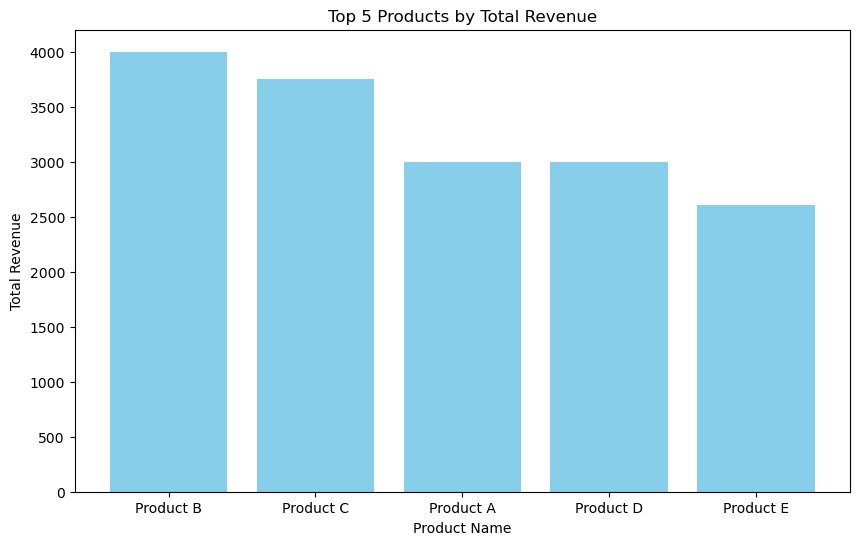

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(df_top_five['product_name'], df_top_five['total_rev'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 5 Products by Total Revenue')
plt.show()